# Create a Dynamic Plotly Chart
create a dynamic line chart: there will be a dropdown menu in the browser with two options. When an option is selected, the browser will display the graph for the dataset associated with that option.

We'll first help Roza create a simple dynamic line chart in Plotly. As before, we'll create an index.html page with the appropriate links to CDNs and a JavaScript file (plots.js). The page also has a dropdown menu with an id of dropdownMenu:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="X-UA-Compatible" content="ie=edge">
  <title>Events</title>
  <script src="https://d3js.org/d3.v5.min.js"></script>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
<body>
  <div id="plot"></div>
  <select id="dropdownMenu">
    <option value="dataset1">DataSet1</option>
    <option value="dataset2">DataSet2</option>
  </select>
  <script src="plots.js"></script>
</body>
</html>

## init()

Take a moment to examine plots.js in detail:

In [ ]:
function init() {
  data = [{
    x: [1, 2, 3, 4, 5],
    y: [1, 2, 4, 8, 16] }];
  Plotly.newPlot("plot", data);
};

d3.selectAll("#dropdownMenu").on("change", updatePlotly);
function updatePlotly() {
  var dropdownMenu = d3.select("#dropdownMenu");
  var dataset = dropdownMenu.property("value");

  var xData = [1, 2, 3, 4, 5];
  var yData = [];

  if (dataset === 'dataset1') {
    yData = [1, 2, 4, 8, 16];
  };

  if (dataset === 'dataset2') {
    yData = [1, 10, 100, 1000, 10000];
  };

  var trace = {
    x: [xData],
    y: [yData],
  };
  Plotly.restyle("plot", trace);
};

init();

The first function to execute is init(), which renders the initial visualization:

In [ ]:
function init() {
  data = [{
    x: [1, 2, 3, 4, 5],
    y: [1, 2, 4, 8, 16] }];
  Plotly.newPlot("plot", data);
};
init();

In this part of the code, a simple line chart, with x and y axes, is rendered with Plotly.newPlot(). By default, when a user opens index.html in a browser, this is the chart that is displayed:

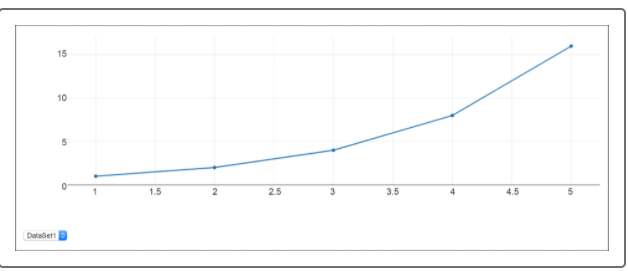

Notice, however, that there is a dropdown menu, and that the visualization changes when the DataSet2 option is selected:

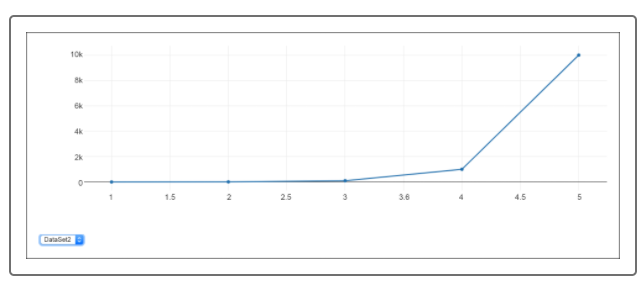

When the user first loads the page, init() is called, and the initial plot is rendered. However, when the user selects a dropdown menu option, the updatePlotly() function is called:

In [ ]:
d3.selectAll("#dropdownMenu").on("change", updatePlotly);

Specifically, through the d3.selectAll() function, when a change takes place to the HTML DOM element with the id of dropdownMenu, the upDatePlotly() function is triggered.

Let's now dissect the updatePlotly() function:



## UpdatePlotly() function

In [ ]:
function updatePlotly() {
  var dropdownMenu = d3.select("#dropdownMenu");
  var dataset = dropdownMenu.property("value");

  var xData = [1, 2, 3, 4, 5];
  var yData = [];

  if (dataset === 'dataset1') {
    yData = [1, 2, 4, 8, 16];
  };

  if (dataset === 'dataset2') {
    yData = [1, 10, 100, 1000, 10000];
  };

  var trace = {
    x: [xData],
    y: [yData],
  };

  Plotly.restyle("plot", trace);
};

The variable dropdownMenu is assigned to the DOM element with the id of dropdownMenu. Recall that it's the dropdown menu from index.html:

In [ ]:
<select id="dropdownMenu">
  <option value="dataset1">DataSet1</option>
  <option value="dataset2">DataSet2</option>
</select>

The variable dataset is assigned to the value of the dropdown menu option selected by the user. Here, it is either "dataset1"or "dataset2".

The rest of updatePlotly() function is concerned with switching between two datasets:

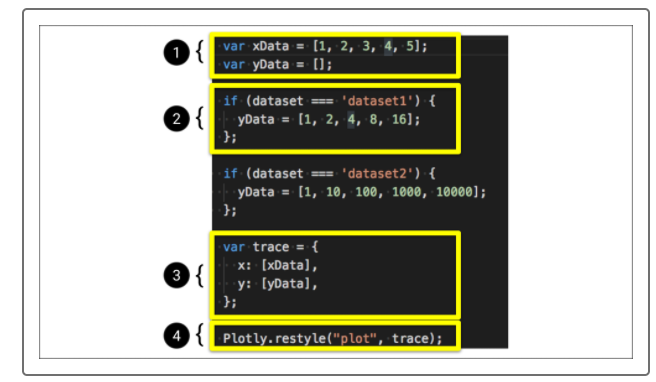

Let's break down this code:

The x-axis values, or xData, remain the same. However, the y-axis values, or yData, depend on which dropdown menu option was selected. yData is initially a blank array.

If the value of the dropdown menu option is 'dataset1', yData is assigned an array of integers. If 'dataset2' is chosen, another array of integers is assigned to yData.

The xData and yData arrays are assembled inside the trace object. Unlike the Plotly.newPlot() method, thePlotly.restyle() method defaults to accepting an object (trace in this case) as its data argument, rather than an array.

The Plotly.restyle() method is used to re-render the page on the browser. This method is more efficient than calling the Plotly.newPlot() method, as it does not create a brand new chart from scratch, but instead modifies the previously displayed chart with the updated information.

The line  Plotly.restyle(“plot” trace); refers to 
A div containing a chart and a JavaScript object.